<a href="https://colab.research.google.com/github/AlexeyTri/MLSeminars/blob/main/MLHSE/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_3_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучите логистическую регрессию для предсказания того, откликнется клиент на рекламное предложение (target = 1) или нет (target = 0).

In [ ]:
# подключить библиотеки
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%203/ClientsData.csv')

In [ ]:
data.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0


In [ ]:
data.shape

(15223, 11)

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('TARGET', axis=1)
y = data['TARGET']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)

In [ ]:
accuracy = (prediction == y_test).mean()
accuracy

0.8776001751696957

In [ ]:
probs_test = model.predict_proba(x_test)

probs_test[:10]

array([[0.86331972, 0.13668028],
       [0.86305957, 0.13694043],
       [0.80967732, 0.19032268],
       [0.73110167, 0.26889833],
       [0.87780414, 0.12219586],
       [0.96122864, 0.03877136],
       [0.95965491, 0.04034509],
       [0.96560659, 0.03439341],
       [0.92114871, 0.07885129],
       [0.9349701 , 0.0650299 ]])

In [ ]:
model.coef_, model.intercept_

(array([[-5.55214705e-02, -7.90868782e-04, -4.28172545e-04,
         -1.07248154e-03, -1.34958177e-03, -4.95807875e-04,
          1.13131722e-05, -1.80011616e-03, -1.26843809e-03,
         -1.45283567e-05]]), array([-0.00115086]))

# Стохастический градиентный спуск для обучения логистической регрессии.
Что вы сделаете:

Разберетесь, как реализовывать log-loss в Python.
Научитесь вычислять градиент log-loss.
Потренируетесь обучать модель логистической регрессии с помощью метода стохастического градиентного спуска.
В этом задании будем практиковаться на данных о давлении пациентов. Столбцы в используемой таблице:

DBP, SBP — нормализованные и приведённые к общей шкале показатели давления человека;
target — целевая переменная, показывающая, болен человек или нет (болезнь такова, что определяется по показателям давления).
У нас не будет новых данных. Наша цель — построить модель, хорошо объясняющую имеющиеся данные. Поэтому делить данные на части мы не будем, а будем обучать метод на всех данных и на всех данных его проверять.

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%203/BloodPressure.csv")

df.head()

,SBP,DBP,target
0,0.943625,-0.679783,1
1,-0.868018,-0.253922,0
2,-1.767471,-0.999924,0
3,0.572276,0.394579,1
4,-1.436026,-1.307645,0


In [ ]:
X = df[['SBP','DBP']]
y = df['target'].values

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
def compute_cost(x, y, theta):
    n = len(y)
    h = sigmoid(x @ theta)
    epsilon = 1e-5
    cost = (1/n) * (((-y).T @ np.log(h + epsilon)) - ((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [ ]:
def stochastic_gradient_descent(X, y, params, learning_rate, iterations):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    params = np.random.rand(X.shape[1])

    cost_track = np.zeros((iterations, 1))

    for i in range(iterations):
        ind = random.sample(range(X.shape[0]), 1)


        params = params - learning_rate * (X[ind] * (sigmoid(X[ind] @ params) - y[ind]))
        
        params = params.ravel()
        cost_track[i] = compute_cost(X, y, params)

    return params, cost_track

In [ ]:
def predict(x, params):
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    return np.round(sigmoid(x @ params))

In [ ]:
params = np.zeros((X.shape[1],1))

iterations = 1500
learning_rate = 0.03

In [ ]:
params_optimal, cost_history = stochastic_gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

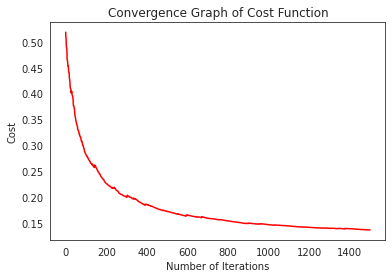

In [ ]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
pred = predict(X, params_optimal)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(pred, y)

0.968

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

_ = model.fit(X, y)

predict = model.predict(X)
accuracy_score(predict, y)

0.968